# Gold recovery project by Maria Shemyakina

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
train_df=pd.read_csv('gold_recovery_train.csv', index_col='date', parse_dates=True)
test_df=pd.read_csv('gold_recovery_test.csv', index_col='date', parse_dates=True)
full_df=pd.read_csv('gold_recovery_full.csv', index_col='date', parse_dates=True)

In [3]:
full_df.head().T


date,2016-01-15 00:00:00,2016-01-15 01:00:00,2016-01-15 02:00:00,2016-01-15 03:00:00,2016-01-15 04:00:00
final.output.concentrate_ag,6.055403,6.029369,6.055926,6.047977,6.148599
final.output.concentrate_pb,9.889648,9.968944,10.213995,9.977019,10.142511
final.output.concentrate_sol,5.507324,5.257781,5.383759,4.858634,4.939416
final.output.concentrate_au,42.192020,42.701629,42.657501,42.689819,42.774141
final.output.recovery,70.541216,69.266198,68.116445,68.347543,66.927016
...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,-498.310211,-500.169983,-500.129135,-499.201640,-501.686727
secondary_cleaner.state.floatbank5_b_air,8.079666,7.984757,8.013877,7.977324,7.894242
secondary_cleaner.state.floatbank5_b_level,-500.470978,-500.582168,-500.517572,-500.255908,-500.356035
secondary_cleaner.state.floatbank6_a_air,14.151341,13.998353,14.028663,14.005551,13.996647


In [4]:
full_df.shape


(22716, 86)

In [5]:
train_df.shape



(16860, 86)

In [6]:
test_df.shape



(5856, 52)

In [7]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant                      21170 non-null float64
primary_c

In [8]:
full_df.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


In [9]:
full_df.isnull().sum().sort_values(ascending=False)

rougher.output.recovery                          3119
rougher.output.tail_ag                           2737
rougher.output.tail_sol                          2736
rougher.output.tail_au                           2736
rougher.input.floatbank11_xanthate               2257
                                                 ... 
rougher.calculation.sulfate_to_au_concentrate      44
primary_cleaner.state.floatbank8_d_level           43
primary_cleaner.state.floatbank8_b_level           43
primary_cleaner.state.floatbank8_c_level           43
primary_cleaner.input.feed_size                     0
Length: 86, dtype: int64

Our data have a lot of missing values. Test data contains 5,856 rows and 53 columns. 

### 1.2. Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature. Find the MAE between your calculations and the feature values. Provide findings.

In [10]:
def recovery_calc(df, c, f, t, new_column):
    df[new_column] = (df[c]*(df[f] - df[t]))/(df[f]*(df[c]-df[t]))*100

temp_train_df = train_df[train_df['rougher.output.recovery'].isna()==False]


recovery_calc(
    temp_train_df,
    'rougher.output.concentrate_au',
    'rougher.input.feed_au',
    'rougher.output.tail_au',
    'rougher.output.recovery_calculated'
)




/Users/mariashemyakina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
mae = mean_absolute_error(temp_train_df['rougher.output.recovery_calculated'], temp_train_df['rougher.output.recovery'])
print('MAE =', mae)

MAE = 9.444891926100695e-15


### 1.3. Analyze the features not available in the test set. What are these parameters? What is their type?

let's look at the columns that are not in the test sample

In [12]:
col_not_in_testdf = set(train_df.columns).difference(set(test_df.columns))
for col in sorted(col_not_in_testdf):
    print(col)

final.output.concentrate_ag
final.output.concentrate_au
final.output.concentrate_pb
final.output.concentrate_sol
final.output.recovery
final.output.tail_ag
final.output.tail_au
final.output.tail_pb
final.output.tail_sol
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_au
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_au
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
rougher.calculation.au_pb_ratio
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.sulfate_to_au_concentrate
rougher.output.concentrate_ag
rougher.output.concentrate_au
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_au
rougher.output.tail_pb
rougher.output.tail_sol
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_au
secondary_cleaner.

As we can see, the test dataframe lacks the parameters of the resulting product for different stages of cleaning, as well as the calculated characteristics of the flotation unit.

### 1.4. Perform data preprocessing.


Since the df_test table does not have target traits 'rougher.output.recovery' and 'final.output.recovery', we need to add them. These target features can be found in the df_full table.

In [13]:
test_df = test_df.merge(full_df[['rougher.output.recovery', 'final.output.recovery']], on='date', how='left')

In [14]:
#Let's look at the duplicates

print(train_df.duplicated().sum(), test_df.duplicated().sum(), full_df.duplicated().sum())

train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()
full_df = full_df.drop_duplicates()

print(train_df.duplicated().sum(), test_df.duplicated().sum(), full_df.duplicated().sum())

16 6 22
0 0 0


In [15]:
print(test_df['rougher.output.recovery'].isna().sum(), test_df['final.output.recovery'].isna().sum())
test_df = test_df.dropna(subset=['rougher.output.recovery', 'final.output.recovery'])

print(test_df['rougher.output.recovery'].isna().sum(), test_df['final.output.recovery'].isna().sum())

540 436
0 0


In [16]:
print(train_df['rougher.output.recovery'].isna().sum(), train_df['final.output.recovery'].isna().sum())
train_df = train_df.dropna(subset=['rougher.output.recovery', 'final.output.recovery'])

print(train_df['rougher.output.recovery'].isna().sum(), train_df['final.output.recovery'].isna().sum())

2557 1505
0 0


Let's fill the missing value

In [17]:
train_df = train_df.fillna(method='ffill')
test_df = test_df.fillna(method='ffill')
full_df=full_df.fillna(method='ffill')

In [18]:
print(train_df['rougher.output.recovery'].isna().sum(), train_df['final.output.recovery'].isna().sum())

0 0


## 2. Analyze the data

### 2.1. Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.


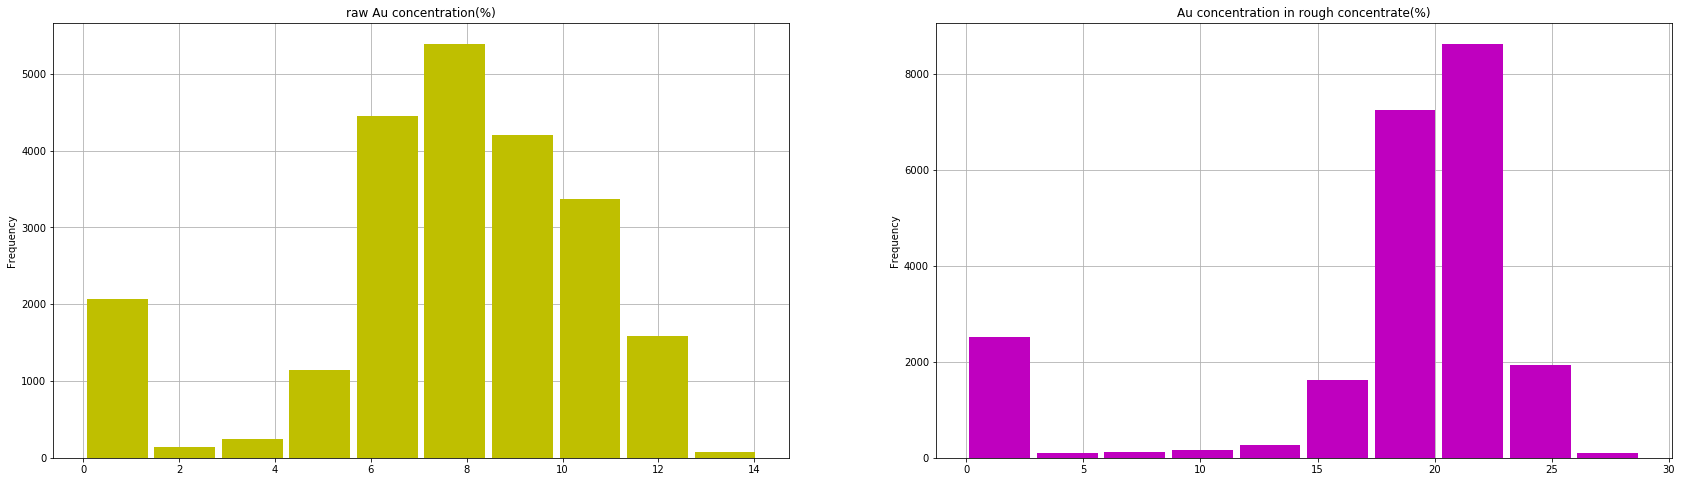

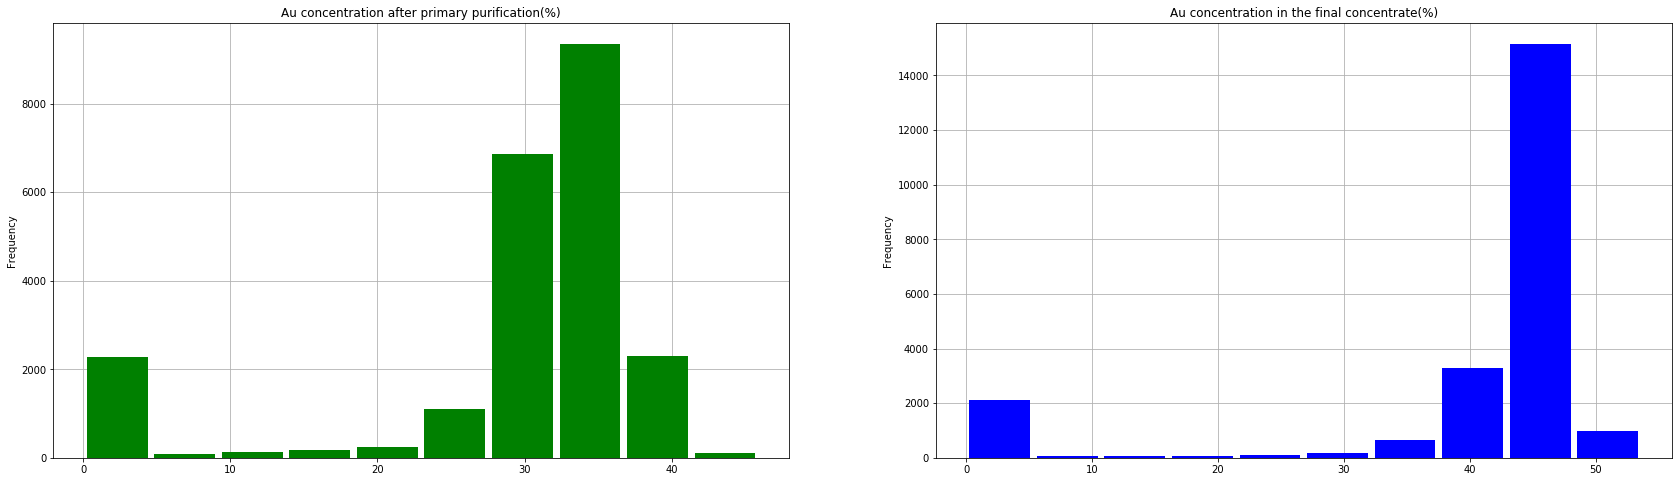

In [19]:
#Change in Au concentration.
fig, axs=plt.subplots(1,2, figsize=(29,8))
full_df['rougher.input.feed_au'].plot(kind='hist',title='raw Au concentration(%)',grid=True, color='y', zorder=2, rwidth=0.9, ax=axs[0])
full_df['rougher.output.concentrate_au'].plot(kind='hist',title='Au concentration in rough concentrate(%)',grid=True, color='m', zorder=2, rwidth=0.9, ax=axs[1])
plt.show()
fig, axs=plt.subplots(1,2, figsize=(29,8))
full_df['primary_cleaner.output.concentrate_au'].plot(kind='hist',title='Au concentration after primary purification(%)',grid=True,color='g', zorder=2, rwidth=0.9, ax=axs[0])
full_df['final.output.concentrate_au'].plot(kind='hist',title='Au concentration in the final concentrate(%)',grid=True, color='b', zorder=2, rwidth=0.9, ax=axs[1])
plt.show()

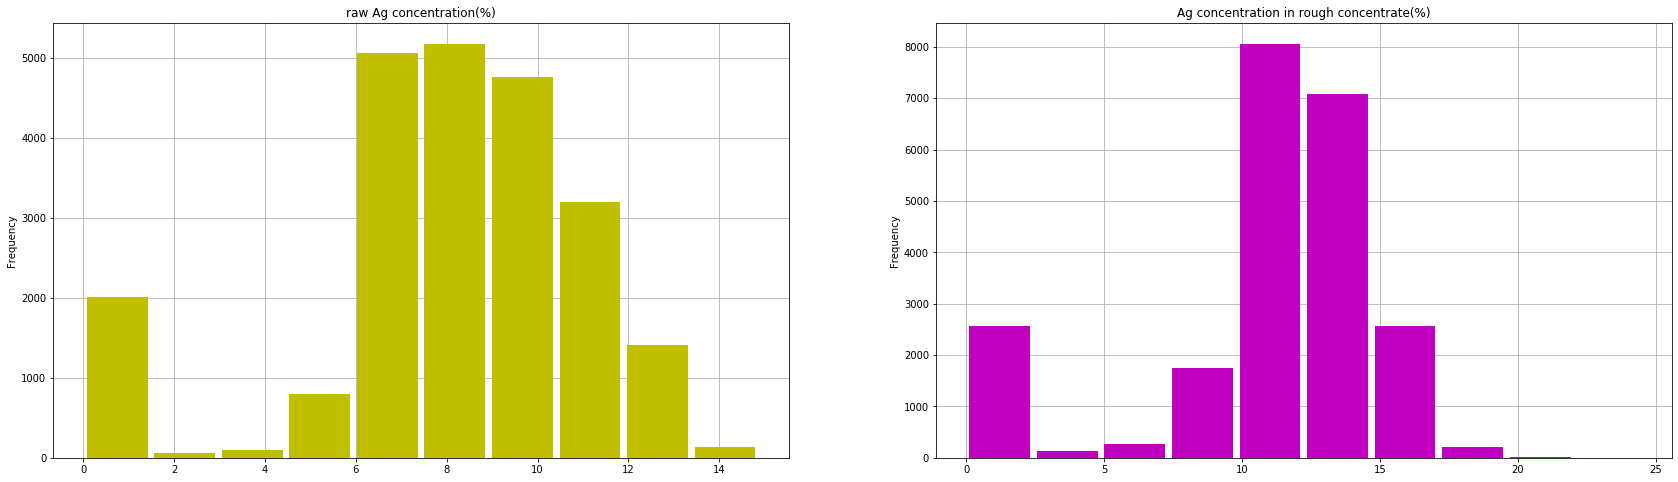

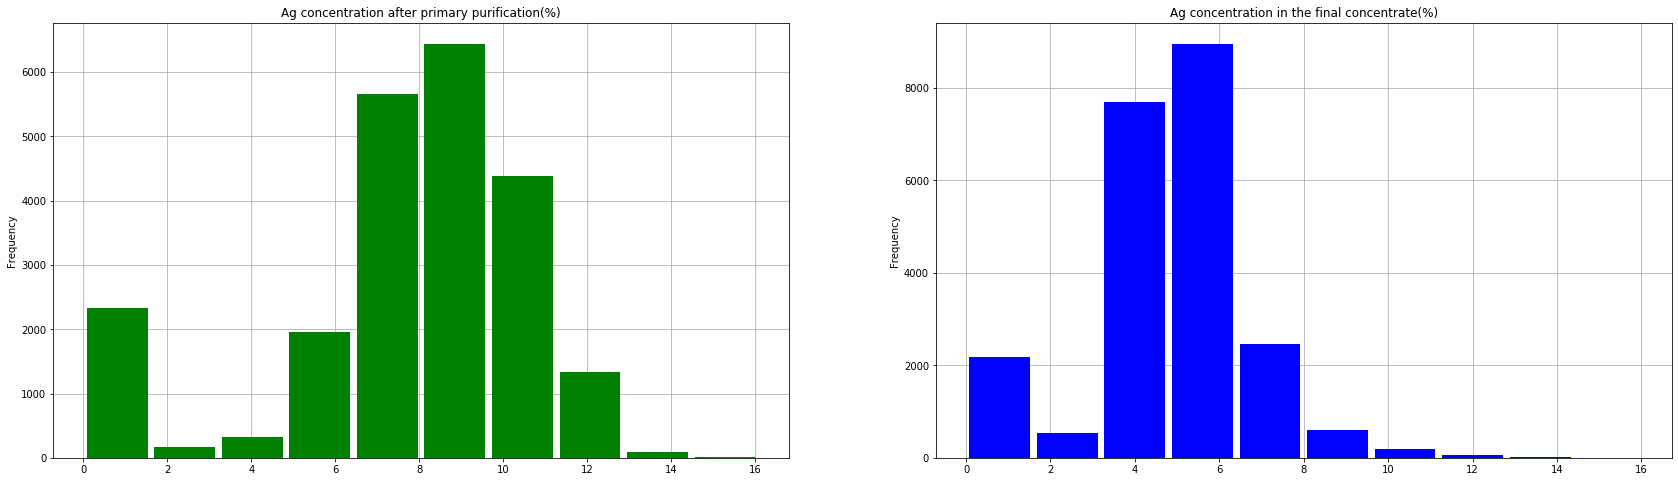

In [20]:
#Change in Ag concentration.
fig, axs=plt.subplots(1,2, figsize=(29,8))
full_df['rougher.input.feed_ag'].plot(kind='hist',title='raw Ag concentration(%)',grid=True, color='y', zorder=2, rwidth=0.9, ax=axs[0])
full_df['rougher.output.concentrate_ag'].plot(kind='hist',title='Ag concentration in rough concentrate(%)',grid=True, color='m', zorder=2, rwidth=0.9, ax=axs[1])
plt.show()
fig, axs=plt.subplots(1,2, figsize=(29,8))
full_df['primary_cleaner.output.concentrate_ag'].plot(kind='hist',title='Ag concentration after primary purification(%)',grid=True,color='g', zorder=2, rwidth=0.9, ax=axs[0])
full_df['final.output.concentrate_ag'].plot(kind='hist',title='Ag concentration in the final concentrate(%)',grid=True, color='b', zorder=2, rwidth=0.9, ax=axs[1])
plt.show()

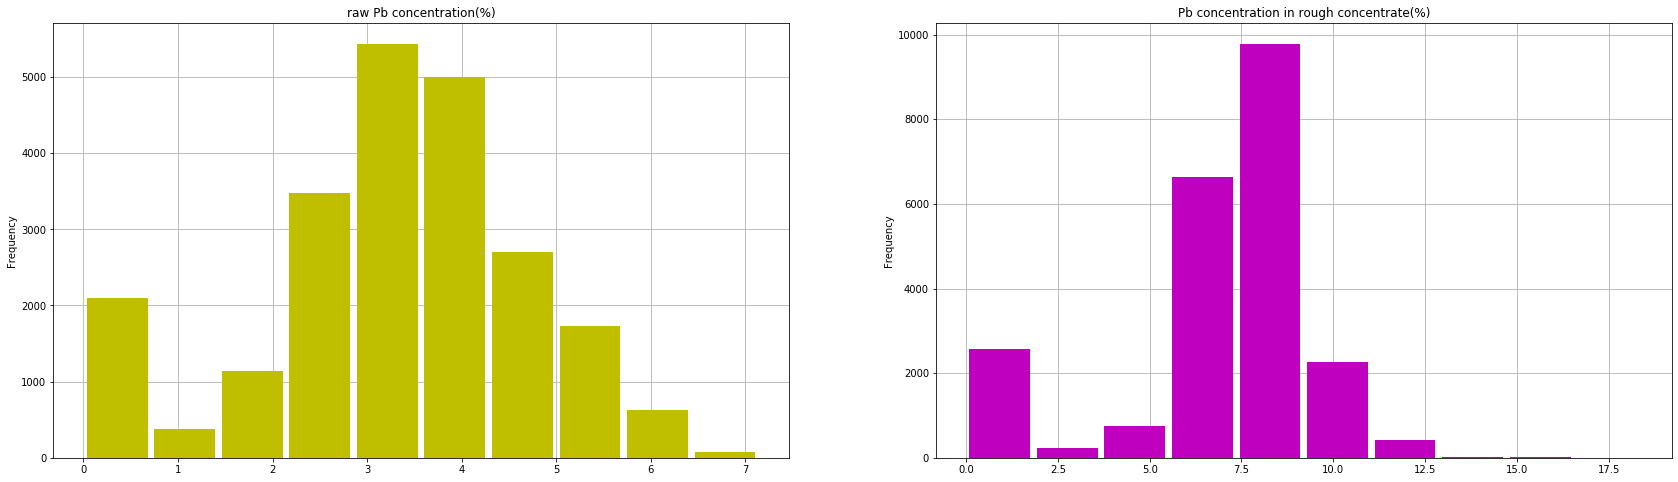

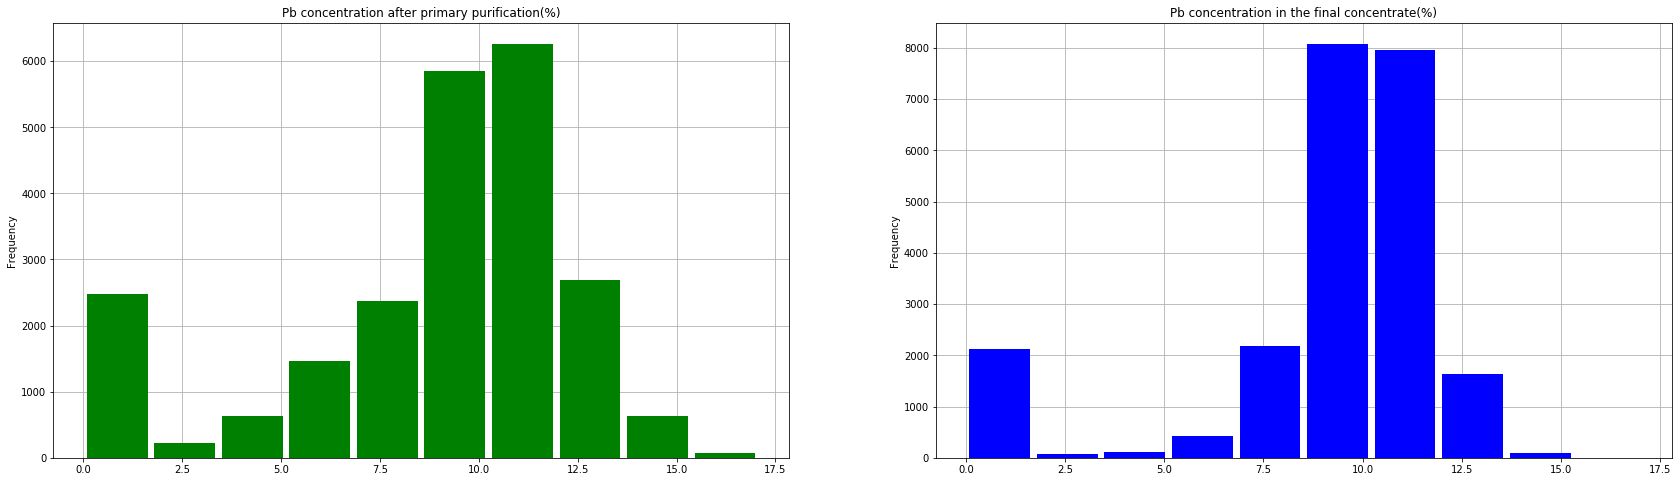

In [21]:
#Change in Pb concentration.
fig, axs=plt.subplots(1,2, figsize=(29,8))
full_df['rougher.input.feed_pb'].plot(kind='hist',title='raw Pb concentration(%)',grid=True, color='y', zorder=2, rwidth=0.9, ax=axs[0])
full_df['rougher.output.concentrate_pb'].plot(kind='hist',title='Pb concentration in rough concentrate(%)',grid=True, color='m', zorder=2, rwidth=0.9, ax=axs[1])
plt.show()
fig, axs=plt.subplots(1,2, figsize=(29,8))
full_df['primary_cleaner.output.concentrate_pb'].plot(kind='hist',title='Pb concentration after primary purification(%)',grid=True,color='g', zorder=2, rwidth=0.9, ax=axs[0])
full_df['final.output.concentrate_pb'].plot(kind='hist',title='Pb concentration in the final concentrate(%)',grid=True, color='b', zorder=2, rwidth=0.9, ax=axs[1])
plt.show()

after the flotation procedure, a low concentration of silver and lead, and a high concentration of gold can be noted. After primary purification, the concentration of lead and silver increases slightly, while the gold decreases.
Thus, the concentration of gold increases after each purification step.

### 2.2. Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.





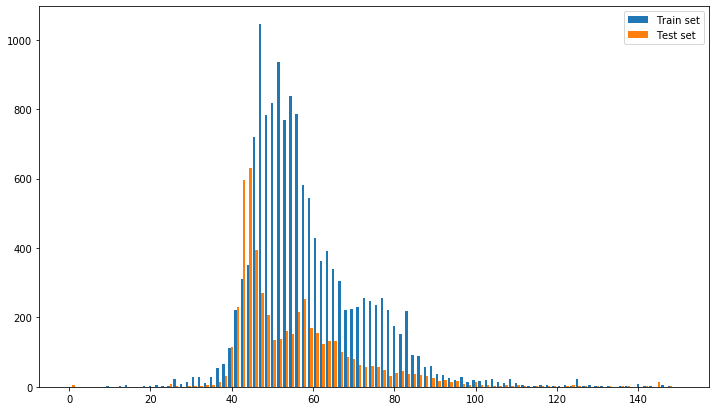

In [22]:
plt.figure(figsize=(12,7))
plt.hist([train_df['rougher.input.feed_size'], test_df['rougher.input.feed_size']], bins = 100,
         label=['Train set', 'Test set'], range=(0,150))
plt.legend()
plt.show()

particle size distributions in the training set and in the test set is slightly different

### 2.3. Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies.

In [23]:
#Let's find the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate.
full_df['rougher.input.concentrate_total'] = full_df[['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_au']].T.sum()
full_df['rougher.output.concentrate_total'] = full_df[['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']].T.sum()
full_df['primary_cleaner.output.concentrate_total'] = full_df[['primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au']].T.sum()
full_df['final.output.concentrate_total'] = full_df[['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au']].T.sum()



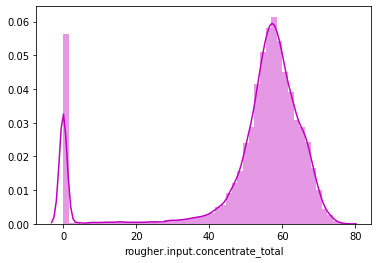

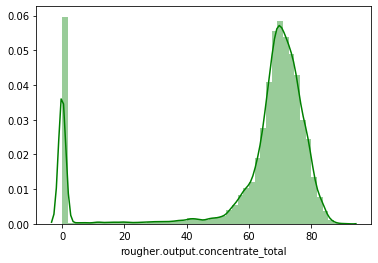

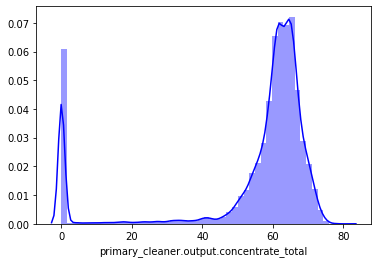

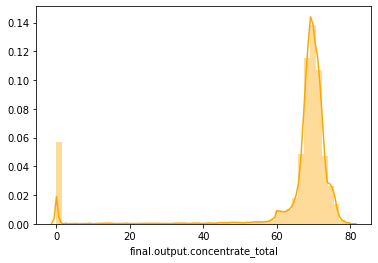

In [24]:
# We will build graphs of the distribution of total concentrations at different stages
sns.distplot(full_df['rougher.input.concentrate_total'], color='m')
plt.show()
sns.distplot(full_df['rougher.output.concentrate_total'], color='g')
plt.show()
sns.distplot(full_df['primary_cleaner.output.concentrate_total'], color='blue')
plt.show()
sns.distplot(full_df['final.output.concentrate_total'], color='orange')
plt.show()

In [25]:
# Get rid of abnormal concentrations of the rows in all datasets
full_df = full_df[full_df['rougher.input.concentrate_total'] > 40]
full_df = full_df[full_df['rougher.output.concentrate_total'] > 40]
full_df = full_df[full_df['primary_cleaner.output.concentrate_total'] > 40]
full_df = full_df[(full_df['final.output.concentrate_total'] > 40) & (full_df['rougher.output.recovery'] != 0)]



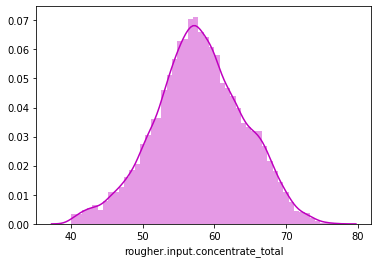

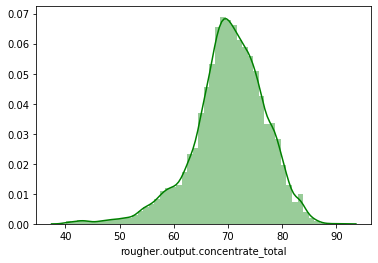

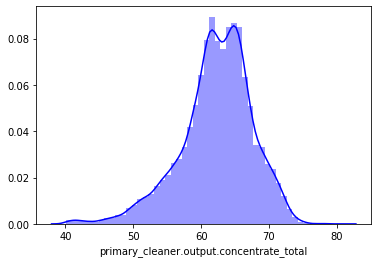

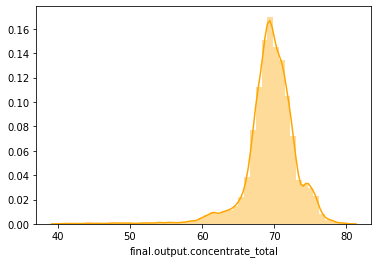

In [26]:
# Let's plot the distribution of total concentrations at different stages
sns.distplot(full_df['rougher.input.concentrate_total'], color='m')
plt.show()
sns.distplot(full_df['rougher.output.concentrate_total'], color='g')
plt.show()
sns.distplot(full_df['primary_cleaner.output.concentrate_total'], color='b')
plt.show()
sns.distplot(full_df['final.output.concentrate_total'], color='orange')
plt.show()

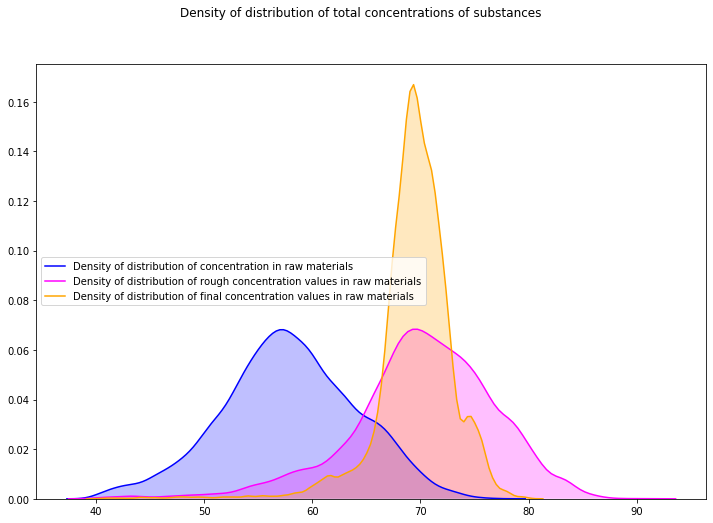

In [27]:
fig=plt.subplots(figsize=(12,8))
fig=sns.kdeplot(full_df['rougher.input.concentrate_total'], shade=True,
              color = 'blue', label="Density of distribution of concentration in raw materials")

fig=sns.kdeplot(full_df['rougher.output.concentrate_total'],  shade=True,
              color = 'magenta', 
             label="Density of distribution of rough concentration values in raw materials")
fig=sns.kdeplot(full_df['final.output.concentrate_total'],  shade=True,
              color = 'orange', 
             label="Density of distribution of final concentration values in raw materials")

fig.figure.suptitle("Density of distribution of total concentrations of substances", fontsize = 12)

plt.show()

In [28]:
gold_recovery_train=train_df[(train_df != 0).all(axis=1)]
gold_recovery_test=test_df[(test_df != 0).all(axis=1)]


## 3. Build the model
### 3.1. Write a function to calculate the final sMAPE value.



In [29]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

def smape_total(smape_rougher, smape_final):
    return 0.25*smape_rougher + 0.75*smape_final

In [30]:
test_cols = gold_recovery_test.columns
gold_recovery_train_change = gold_recovery_train[gold_recovery_train.columns.intersection(test_cols)]

In [31]:
features_train=gold_recovery_train_change.drop(gold_recovery_train_change.columns[[0,1]],axis=1)
target_train=gold_recovery_train_change[['rougher.output.recovery','final.output.recovery']]

features_test=gold_recovery_test.drop(gold_recovery_test.columns[[0,53]],axis=1)
target_test=gold_recovery_test[['rougher.output.recovery','final.output.recovery']]

In [32]:
#Let's split a dataset
block_size = int(len(gold_recovery_train_change)/3)

for i in range(0, len(gold_recovery_train_change), block_size):
    valid_indexes = gold_recovery_train_change.iloc[i: i + block_size].index
    train_indexes = (gold_recovery_train_change.iloc[:i]+gold_recovery_train_change.iloc[i+block_size:]).index
    features_train2=features_train.loc[train_indexes,:]
    target_train2=target_train.loc[train_indexes]
    features_valid=features_train.loc[valid_indexes,:]
    target_valid=target_train.loc[valid_indexes]

In [33]:
# let's write a function for validation and training model
def cross_model(name):
    model=name
    model.fit(features_train2,target_train2)
    predicted= model.predict(features_valid)
    score = smape(target_valid,predicted)
    final_score=score.mean()
    return (print(' mean sMAPE value:', '{:.2f}%'.format(final_score)))

### 3.2. Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

In [34]:
# Selecting hyperparameters estimators and depth
for estimators in range(10,15,1):
    for depth in range(1,5):
        model_forest =RandomForestRegressor(random_state=1234, max_depth= depth, n_estimators=estimators)
        model_forest.fit(features_train2,target_train2) 
        predicted_forest = model_forest.predict(features_valid)
        print("estimators =", estimators, "and ", end='')
        print("depth =", depth, ": ", end='')
        print(r2_score(target_valid,predicted_forest))

estimators = 10 and depth = 1 : -0.16807034227138018
estimators = 10 and depth = 2 : 0.4540587808807387
estimators = 10 and depth = 3 : 0.5683986013347679
estimators = 10 and depth = 4 : 0.5854496680711665
estimators = 11 and depth = 1 : -0.17391231935847795
estimators = 11 and depth = 2 : 0.454868742687605
estimators = 11 and depth = 3 : 0.571378156347051
estimators = 11 and depth = 4 : 0.5868128105139984
estimators = 12 and depth = 1 : -0.171086807056421
estimators = 12 and depth = 2 : 0.45461213426933195
estimators = 12 and depth = 3 : 0.5721465922538165
estimators = 12 and depth = 4 : 0.5867150718773152
estimators = 13 and depth = 1 : -0.1721717149177463
estimators = 13 and depth = 2 : 0.4545940527604775
estimators = 13 and depth = 3 : 0.5728516513877073
estimators = 13 and depth = 4 : 0.5886921958861491
estimators = 14 and depth = 1 : -0.1739742262376024
estimators = 14 and depth = 2 : 0.4542035355505341
estimators = 14 and depth = 3 : 0.5732970095182919
estimators = 14 and depth 

In [35]:
cross_model(RandomForestRegressor(random_state=12345, max_depth=4, n_estimators=14))

 mean sMAPE value: 4.72%


In [36]:
cross_model(LinearRegression())

 mean sMAPE value: 4.48%


In [37]:
cross_model(DecisionTreeRegressor())

 mean sMAPE value: 6.57%


In [38]:
cross_model(Lasso(alpha=0.2))

 mean sMAPE value: 4.13%


In [39]:
model_final=Lasso(alpha=0.2)
model_final.fit(features_test, target_test)

Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [40]:

test_prediction = model_final.predict(features_test)
score=smape(target_test, test_prediction)
final_score=score.mean()

print('Final sMAPE for test model:', '{:.2f}%'.format(final_score))

Final sMAPE for test model: 2.96%


## Conclusion

We are explore or data, made a preprocessing, use a different models and find out that the  best model in this case is Lasso.